In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df['exports'] = df['exports'] * df['gdpp']/100

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df['health'] = df['health'] * df['gdpp']/100
df['imports'] = df['imports'] * df['gdpp']/100

In [7]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [8]:
df['health'] = round(df['health'], 2)

In [9]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.800,19100,1.44,76.8,2.13,12200


# EDA

In [11]:
list(enumerate(features))

[(0, 'child_mort'),
 (1, 'exports'),
 (2, 'health'),
 (3, 'imports'),
 (4, 'income'),
 (5, 'inflation'),
 (6, 'life_expec'),
 (7, 'total_fer'),
 (8, 'gdpp')]

In [10]:
plt.figure(figsize = (15,10))
features = df.columns[1:]

<Figure size 1080x720 with 0 Axes>

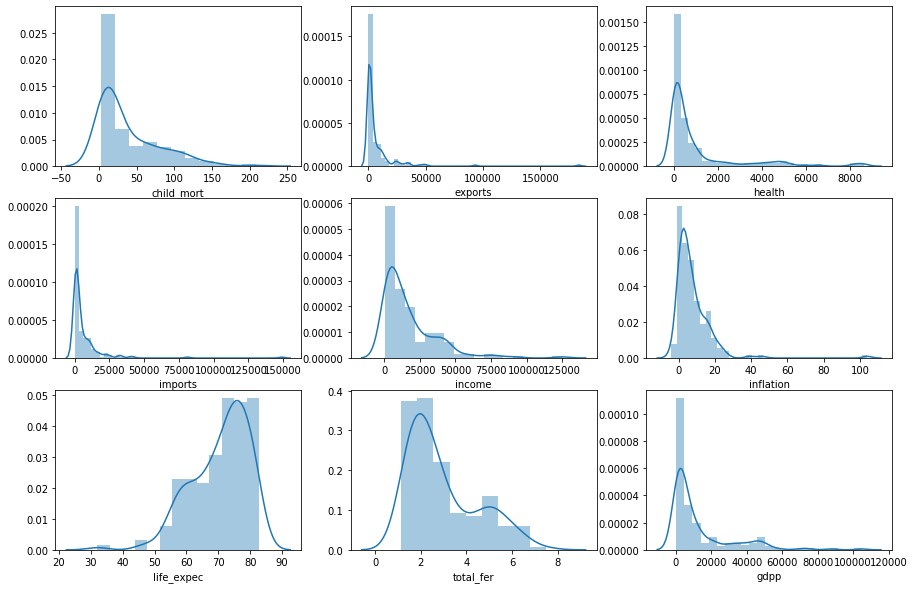

In [11]:
plt.figure(figsize = (15,10))
features = df.columns[1:]
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])

# Outlier Treatment

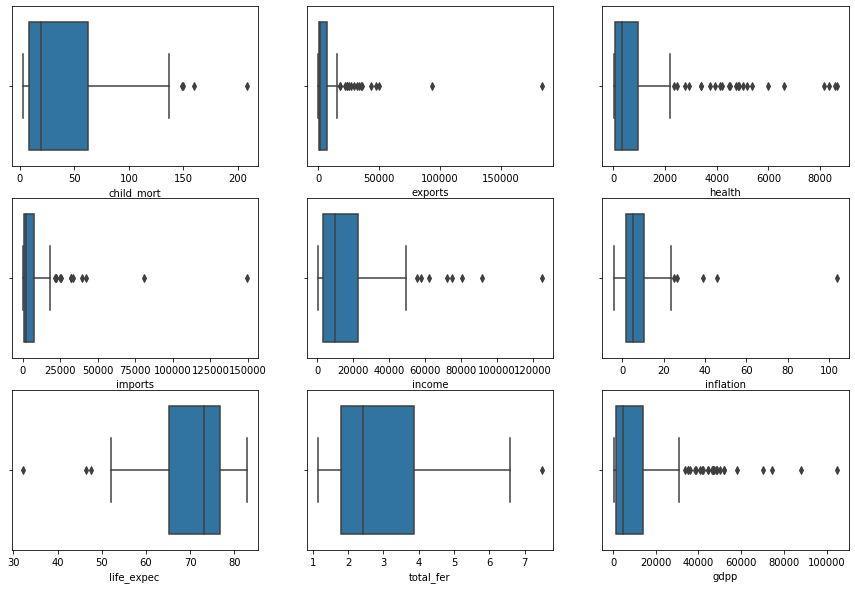

In [12]:
plt.figure(figsize = (15,10))
features = df.columns[1:]
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(df[i[1]])

In [13]:
q1 = df['child_mort'].quantile(0.01)

df['child_mort'][df['child_mort']<=q1] = q1

In [14]:

q4 = df['exports'].quantile(0.99)

df['exports'][df['exports']>=q4] = q4

In [15]:
q4 = df['health'].quantile(0.99)

df['health'][df['health']>=q4] = q4

In [16]:
q4 = df['imports'].quantile(0.99)

df['imports'][df['imports']>=q4] = q4

In [17]:
q4 = df['income'].quantile(0.99)

df['income'][df['income']>=q4] = q4

In [18]:
q4 = df['inflation'].quantile(0.99)

df['inflation'][df['inflation']>=q4] = q4

In [19]:
q4 = df['total_fer'].quantile(0.99)

df['total_fer'][df['total_fer']>=q4] = q4

In [20]:
q4 = df['gdpp'].quantile(0.99)

df['gdpp'][df['gdpp']>=q4] = q4

# Clustering

In [21]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [22]:
hopkins(df.drop('country',axis = 1))

0.8256570784642825

In [23]:
df1 = df.drop ('country', axis = 1)

In [24]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(df1)

In [25]:
df1 = pd.DataFrame(df1)
df1.columns = df.columns[1:]
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-0.569622,-0.566956,-0.598741,-0.851668,0.265002,-1.619092,1.926396,-0.702259
1,-0.538993,-0.473858,-0.440391,-0.413584,-0.386946,-0.372075,0.647866,-0.865054,-0.498726
2,-0.272870,-0.424000,-0.486272,-0.476100,-0.221053,1.122161,0.670423,-0.034983,-0.477434
3,2.007831,-0.381249,-0.534091,-0.463973,-0.612045,1.932987,-1.179234,2.153997,-0.530950
4,-0.695682,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.704258,-0.543736,-0.032042


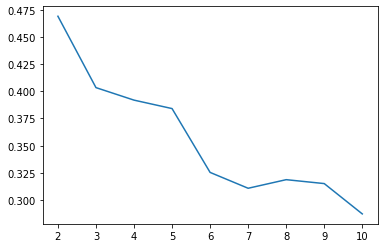

In [26]:
# Let's find out the value of K
# Silhouette Score
# Elbow Curve

from sklearn.metrics import silhouette_score
ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmeans.labels_)])

plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])

In [11]:
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])

NameError: name 'df1' is not defined

In [28]:
# K=3
kmean = KMeans(n_clusters = 3, random_state = 101)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

In [29]:
label = pd.DataFrame(kmean.labels_, columns = ['label'])

In [30]:
df.kmean = df.copy()

In [31]:
df.kmean = pd.concat([df.kmean, label ], axis =1)

In [32]:
df.kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.92,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.90,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.98,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.60,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [33]:
# How many datapoints we have in each cluster
df.kmean.label.value_counts()

1    90
0    48
2    29
Name: label, dtype: int64

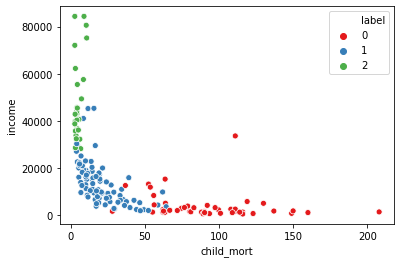

In [34]:
# Plot child_mort vs income
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'label', data = df.kmean, palette = 'Set1')

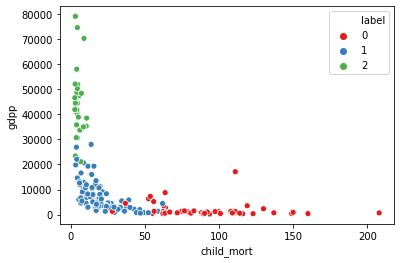

In [35]:
# Plot child_mort vs gdpp
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'label', data = df.kmean, palette = 'Set1')

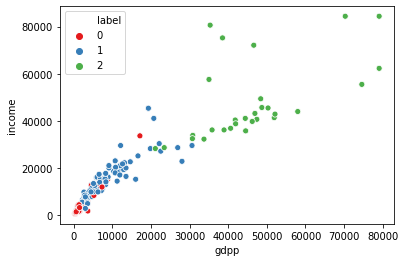

In [36]:
# Plot income vs gdpp
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'label', data = df.kmean, palette = 'Set1')

In [37]:
# Cluster Profiling: GDP CHILD MORT INCOME
df.kmean.drop('country',axis = 1).groupby('label').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
label,,,,,,,,,
0,91.610417,879.063521,114.822083,827.028771,3897.354167,10.608604,59.239583,4.972233,1909.208333
1,20.547778,3477.015539,528.894111,3588.133568,13804.333333,7.110944,73.393333,2.242444,7808.577778
2,4.989655,25405.359310,4239.330028,21316.695862,47784.413793,2.876690,80.479310,1.754138,46068.137931


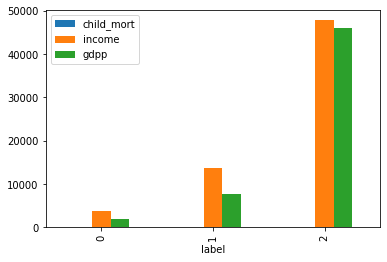

In [38]:
df.kmean.drop(['country', 'exports', 'health','imports','inflation','life_expec','total_fer'],axis = 1).groupby('label').mean().plot(kind = 'bar')

In [39]:
df.kmean[df.kmean['label'] ==0]['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [40]:
df.kmean[df.kmean['label'] ==0].sort_values(by = ['child_mort', 'income','gdpp'], ascending = [False, True,True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,101.286,45.74,428.314,1500.0,5.45,32.1,3.3300,662.0,0
132,Sierra Leone,160.0,67.032,52.27,137.655,1220.0,17.20,55.0,5.2000,399.0,0
32,Chad,150.0,330.096,40.63,390.195,1930.0,6.39,56.5,6.5636,897.0,0
31,Central African Republic,149.0,52.628,17.75,118.190,888.0,2.01,47.5,5.2100,446.0,0
97,Mali,137.0,161.424,35.26,248.508,1870.0,4.37,59.5,6.5500,708.0,0


# Hierarchial

In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

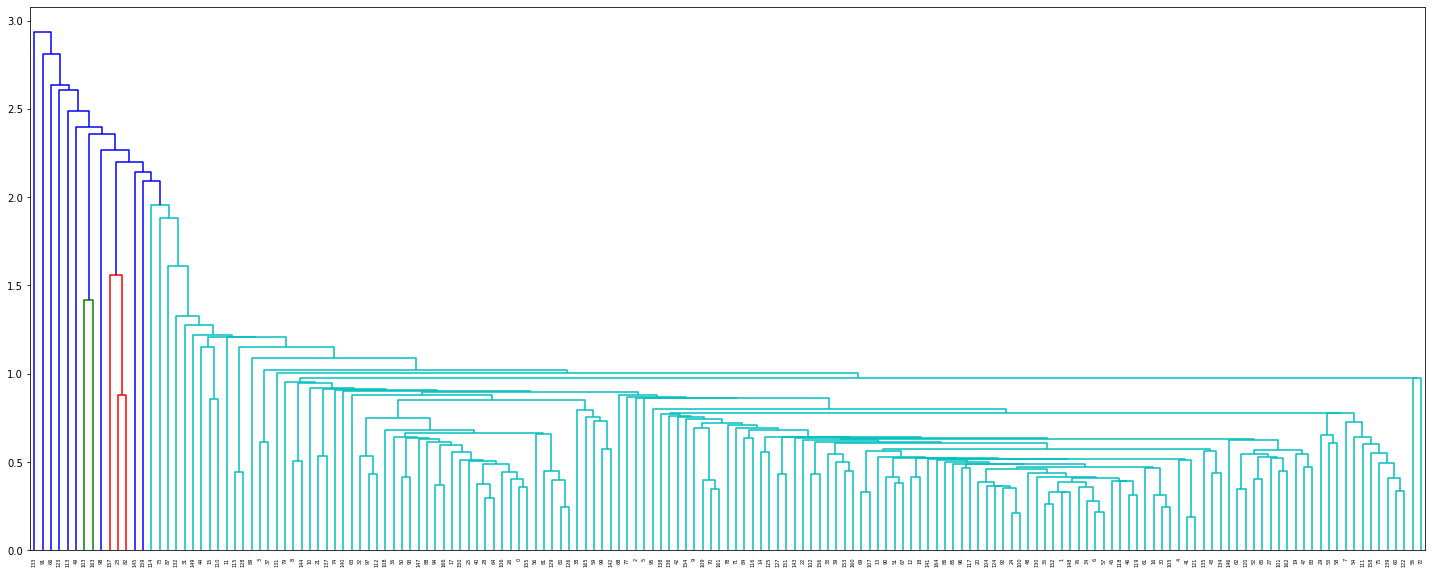

In [46]:
mergings_s = linkage(df1, method = "single", metric='euclidean')
fig = plt.figure(figsize=(25, 10))
dendrogram(mergings_s)
plt.show()

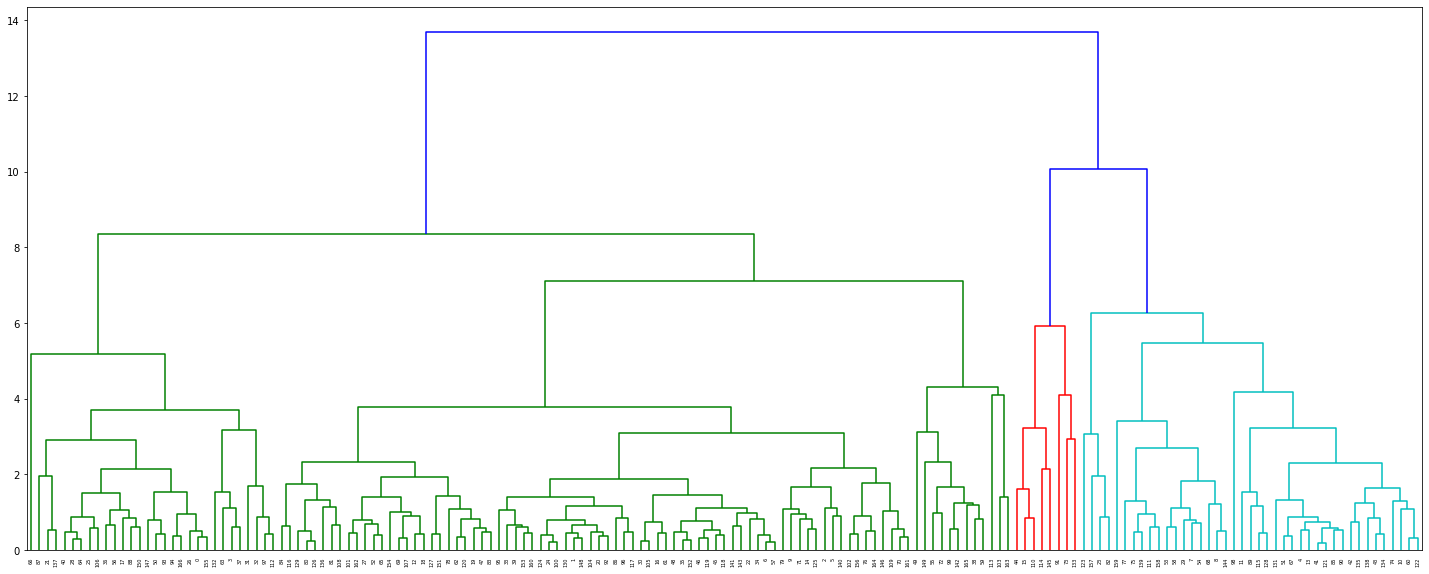

In [45]:
mergings_s = linkage(df1, method = "complete", metric='euclidean')
fig = plt.figure(figsize=(25, 10))
dendrogram(mergings_s)
plt.show()